# Using Grover's algorithm to find out the distance and the code words of a classical error correcting code

Author: José Victor Soares Scursulim

Master in Physics | IBM Qiskit Advocate

Finding the distance of an error correcting code is not an easy task, once this kind of problem belongs to NP-hard complexity class. To do this task, we have to find the minimal Hamming weight of the nonzero codewords of a code and to find the codewords, we have to solve the following modulo 2 equation (See Reference [1]):

$Hx^T = 0$.

Where $H$ is the parity check matrix and $x^T$ is a column vector that represents a codeword of the code.  

The sum modulo 2 has the following rules:

(1) : $0 \oplus 0 = 0$

(2) : $0 \oplus 1 = 1$

(3) : $1 \oplus 0 = 1$

(4) : $1 \oplus 1 = 0$

With this problem in mind and inspired by the exercise 2a of the IBM Quantum Challenge 2020 (See Reference [2]), where we had to solve some modulo 2 equations using Grover's algorithm (See Reference [3]). 

Importing the libraries that we will use in this jupyter. Here we are importing `numpy` to create the matrices that will be the inputs of the class `GroverParityCheckSolver`. 

In [1]:
import numpy as np
from grover_algorithm import GroverParityCheckSolver

# Examples:

## Example (1)

$H = \left[\begin{array}{ccc} 1 & 1 & 0 \\ 1 & 0 & 1 \end{array}\right]$

Defining the parity check matrix above using `np.array()`.

In [2]:
matrix_H = np.array([[1,1,0],[1,0,1]])

$\left[\begin{array}{ccc} 1 & 1 & 0 \\ 1 & 0 & 1 \end{array}\right]\left[\begin{array}{c} x_1 \\ x_2 \\ x_ 3 \end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \end{array}\right]$

(1) : $x_1 + x_2 = 0$

(2) : $x_1 + x_3 = 0$

The equations (1) and (2) are defined when we perform the matrix multiplication, note that the first matrix represents the parity check matrix and the second represents the vector of the codeword we want to discover. This kind of equations can be represented as a quantum circuit with some CNOT gates, once the equation is in modulo 2.

Input $|00\rangle$

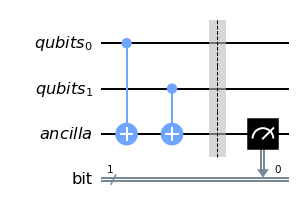

In [3]:
from qiskit import Aer, execute
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram

bit = ClassicalRegister(size = 1, name = 'bit')
qubits = QuantumRegister(size = 2, name = 'qubits')
ancilla = QuantumRegister(size = 1, name = 'ancilla')

qc = QuantumCircuit(qubits, ancilla, bit)

qc.cx(control_qubit = qubits[0], target_qubit = ancilla)
qc.cx(control_qubit = qubits[1], target_qubit = ancilla)
qc.barrier()
qc.measure(qubit = ancilla, cbit = bit)
qc.draw(output = 'mpl')

Output:

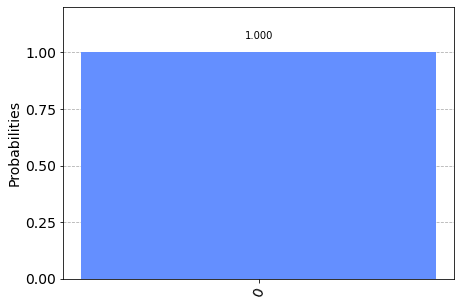

In [4]:
counts = execute(experiments = qc, backend = Aer.get_backend('qasm_simulator'), shots = 1).result().get_counts()
plot_histogram(counts)

Input $|01\rangle$

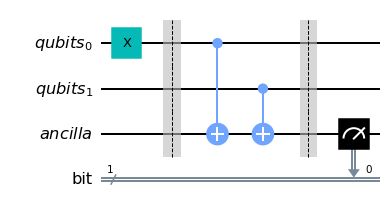

In [5]:
qc = QuantumCircuit(qubits, ancilla, bit)

qc.x(qubit = qubits[0])
qc.barrier()
qc.cx(control_qubit = qubits[0], target_qubit = ancilla)
qc.cx(control_qubit = qubits[1], target_qubit = ancilla)
qc.barrier()
qc.measure(qubit = ancilla, cbit = bit)
qc.draw(output = 'mpl')

Output:

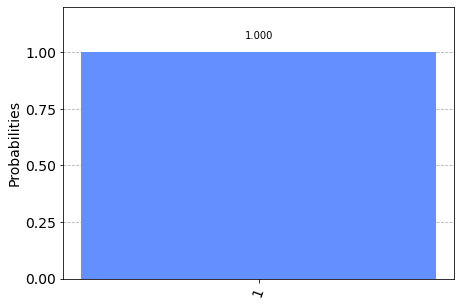

In [6]:
counts = execute(experiments = qc, backend = Aer.get_backend('qasm_simulator'), shots = 1).result().get_counts()
plot_histogram(counts)

Input $|10\rangle$

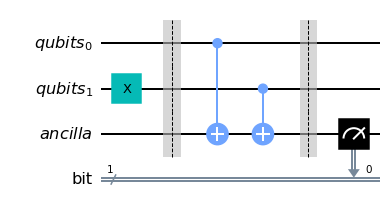

In [7]:
qc = QuantumCircuit(qubits, ancilla, bit)

qc.x(qubit = qubits[1])
qc.barrier()
qc.cx(control_qubit = qubits[0], target_qubit = ancilla)
qc.cx(control_qubit = qubits[1], target_qubit = ancilla)
qc.barrier()
qc.measure(qubit = ancilla, cbit = bit)
qc.draw(output = 'mpl')

Output:

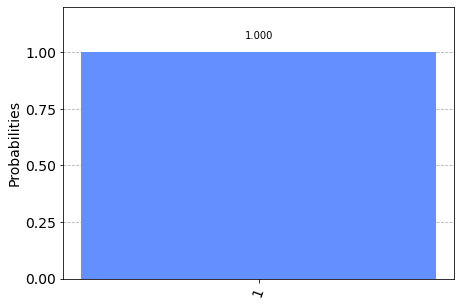

In [8]:
counts = execute(experiments = qc, backend = Aer.get_backend('qasm_simulator'), shots = 1).result().get_counts()
plot_histogram(counts)

Input $|11\rangle$

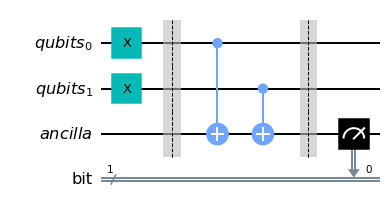

In [9]:
qc = QuantumCircuit(qubits, ancilla, bit)

qc.x(qubit = qubits)
qc.barrier()
qc.cx(control_qubit = qubits[0], target_qubit = ancilla)
qc.cx(control_qubit = qubits[1], target_qubit = ancilla)
qc.barrier()
qc.measure(qubit = ancilla, cbit = bit)
qc.draw(output = 'mpl')

Output:

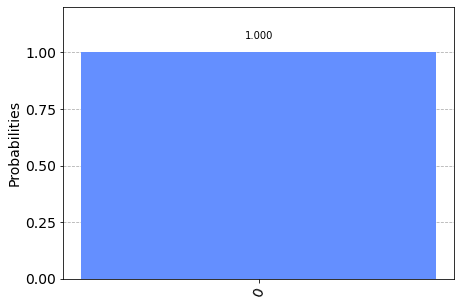

In [10]:
counts = execute(experiments = qc, backend = Aer.get_backend('qasm_simulator'), shots = 1).result().get_counts()
plot_histogram(counts)

A scenario where we perform all the inputs in parallel. That's the scenario where we want, once we will use Grover's algorithm.

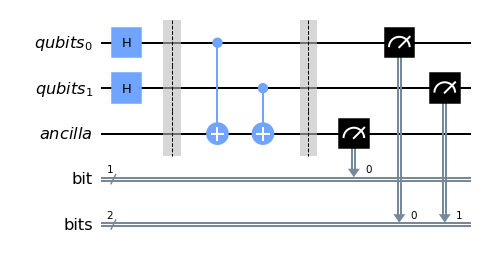

In [11]:
bits = ClassicalRegister(2, name = 'bits')

qc = QuantumCircuit(qubits, ancilla, bit, bits)

qc.h(qubit = qubits)
qc.barrier()
qc.cx(control_qubit = qubits[0], target_qubit = ancilla)
qc.cx(control_qubit = qubits[1], target_qubit = ancilla)
qc.barrier()
qc.measure(qubit = ancilla, cbit = bit)
qc.measure(qubit = qubits, cbit = bits)
qc.draw(output = 'mpl')

Output:

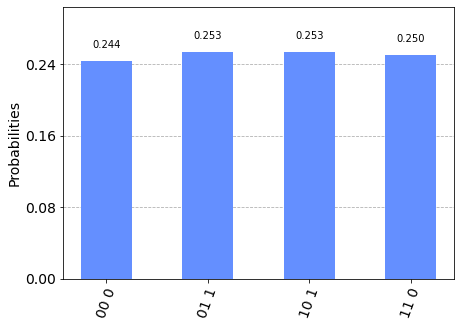

In [12]:
counts = execute(experiments = qc, backend = Aer.get_backend('qasm_simulator'), shots = 8192).result().get_counts()
plot_histogram(counts)

Once we are only interested in the input where the sum modulo 2 is equal to 0, we will need to work with an oracle that marks the state where we have the condition satisfied. In general, an oracle in the Grover's algorithm is performed by a multi-controlled CNOT and since the NOT gate is only applied when all the control qubits are equal to 1, we will need to apply X (NOT) gate before and after all the controls of the multi-controlled CNOT, because in this way we will be selecting only the states where the equation will be satisfied, that's necessary for the trick to add an -1 as relative phase in Grover's algorithm. 

In order to solve the modulo 2 equations, we have to use `GroverParityCheckSolver`. To do that, we will pass the `matrix_H` defined above as the input for `GroverParityCheckSolver`.

In [13]:
gpcs = GroverParityCheckSolver(parity_check_matrix = matrix_H)

If we want to see the quantum circuit that will solve the equations we can call the method `quantum_circuit()`.

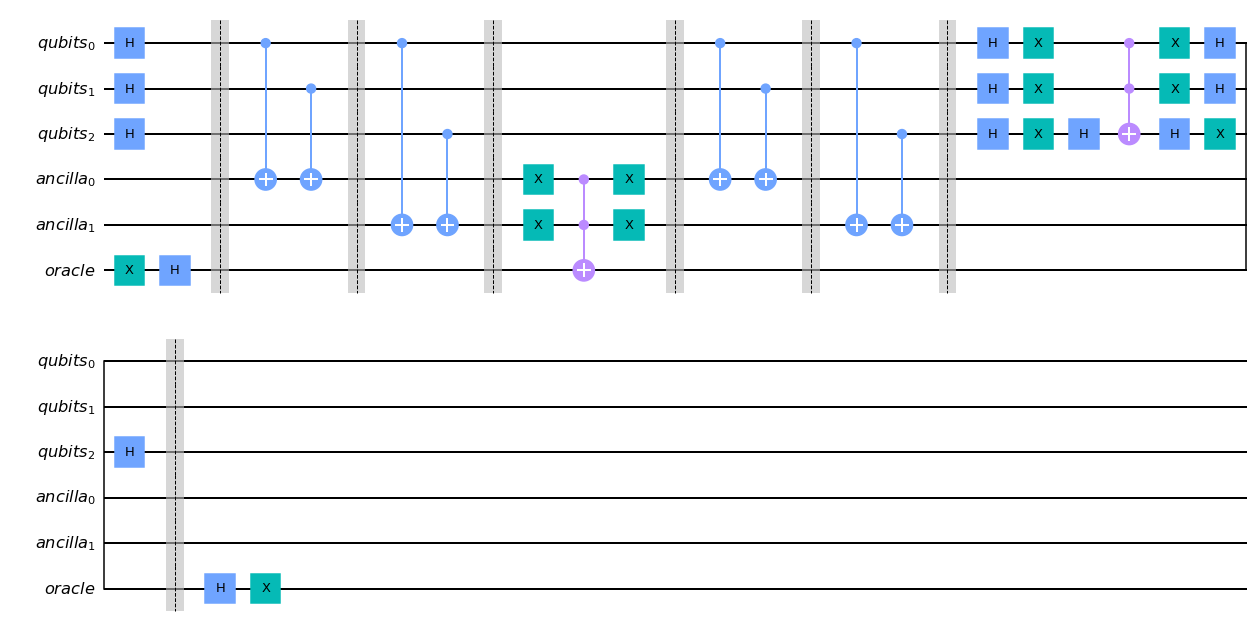

In [14]:
gpcs.quantum_circuit().draw(output = "mpl")

In the circuit above we have: (1) The Grover's algorithm initialization of the qubits; (2) The definition of the modulo 2 equations with CNOT gates where the results are stored in ancilla qubits; (3) The construction of the oracle suited for this problem and the trick of amplitude amplification. Here we are not using measurement gates, because in the code we use the `Statevector` class of the `qiskit.quantum_info` to get the dictionary with the states and its probabilities of measurement. This info is processed in a classical post processing method. Calling the `get_classical_error_correction_code()` method, we will get a dictionary with the information about the code,as the code representation $[n,k,d]$, where $n$ represents the number of bits used to encode the $k$ logical bits and $d$ is the code distance (for instance: [3,1,3]). We also have a list with all codewords that define the code.

In [15]:
gpcs.get_classical_error_correction_code()

{'code': '[3,1,3]', 'n': 3, 'k': 1, 'd': 3, 'codewords': ['000', '111']}

To create the dictionary with the information about the error correcting code linked with the input parity check matrix, we use post processing classical methods. In this step, we investigate the strings of the codewords to count the amount of 1's that is present in it (Hamming weight), that quantity will be used to define the distance of the code. According to the reference [1], the distance of a code is defined by the minimal Hamming weight (the amount of nonzero coordinates in the codeword vector) of any nonzero codeword. 

The examples below have the same code structure, but they only differ from the first example in the definition of the parity check matrix (`matrix_H`). Then, we choose to not explain every step again.

## Example (2)

$H = \left[\begin{array}{cccc} 1 & 0 & 1 & 0\\ 1 & 1 & 0 & 1 \end{array}\right]$

In [16]:
matrix_H = np.array([[1,0,1,0],[1,1,0,1]])

$\left[\begin{array}{cccc} 1 & 0 & 1 & 0\\ 1 & 1 & 0 & 1 \end{array}\right]\left[\begin{array}{c} x_1 \\ x_2 \\ x_ 3 \\ x_4\end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \end{array}\right]$

(1) : $x_1 + x_3 = 0$

(2) : $x_1 + x_2 + x_4 = 0$

In [17]:
gpcs = GroverParityCheckSolver(parity_check_matrix = matrix_H)

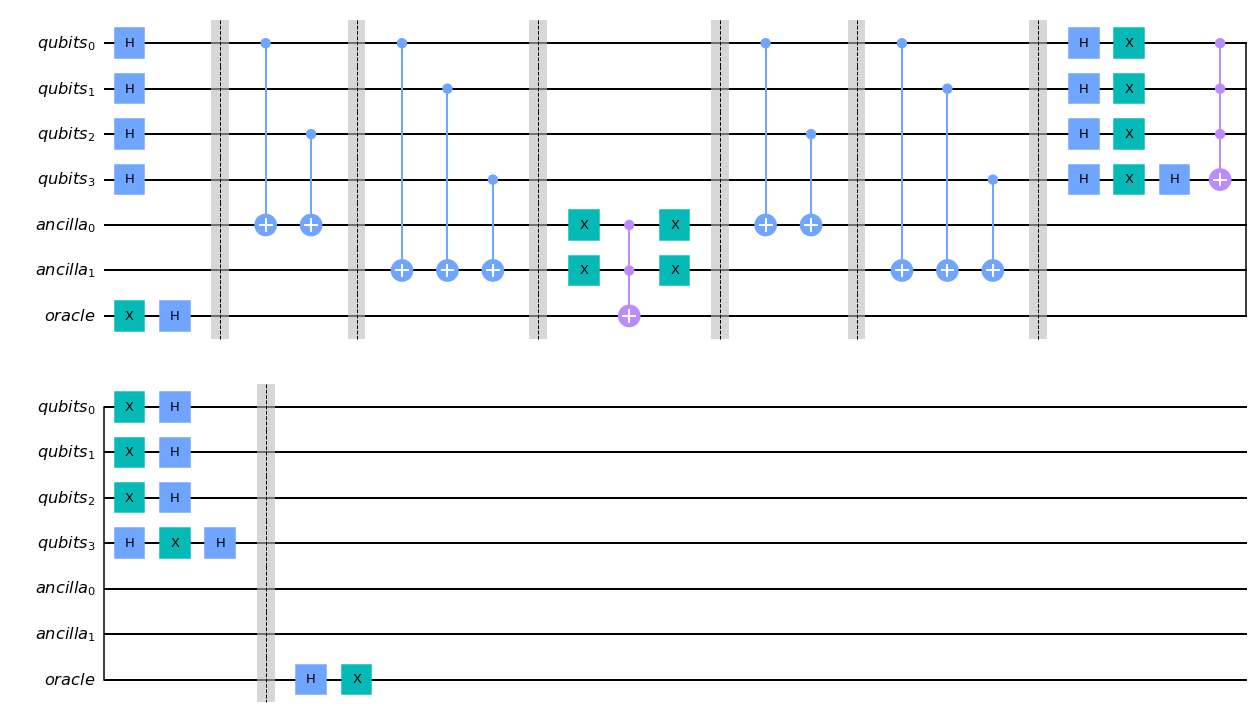

In [18]:
gpcs.quantum_circuit().draw(output = "mpl")

In [19]:
gpcs.get_classical_error_correction_code()

{'code': '[4,2,2]',
 'n': 4,
 'k': 2,
 'd': 2,
 'codewords': ['0000', '0111', '1010', '1101']}

## Example (3)

$H = \left[\begin{array}{ccccc} 1 & 1 & 0 & 0 & 0\\ 1 & 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 1 & 0 \\ 1 & 0 & 0 & 0 & 1 \end{array}\right]$

In [20]:
matrix_H = np.array([[1,1,0,0,0],[1,0,1,0,0],[1,0,0,1,0],[1,0,0,0,1]])

$\left[\begin{array}{ccccc} 1 & 1 & 0 & 0 & 0\\ 1 & 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 1 & 0 \\ 1 & 0 & 0 & 0 & 1 \end{array}\right]\left[\begin{array}{c} x_1 \\ x_2 \\ x_ 3 \\ x_4 \\ x_5\end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \\ 0 \\ 0\end{array}\right]$

(1) : $x_1 + x_2 = 0$

(2) : $x_1 + x_3 = 0$

(3) : $x_1 + x_4 = 0$

(4) : $x_1 + x_5 = 0$

In [21]:
gpcs = GroverParityCheckSolver(parity_check_matrix = matrix_H)

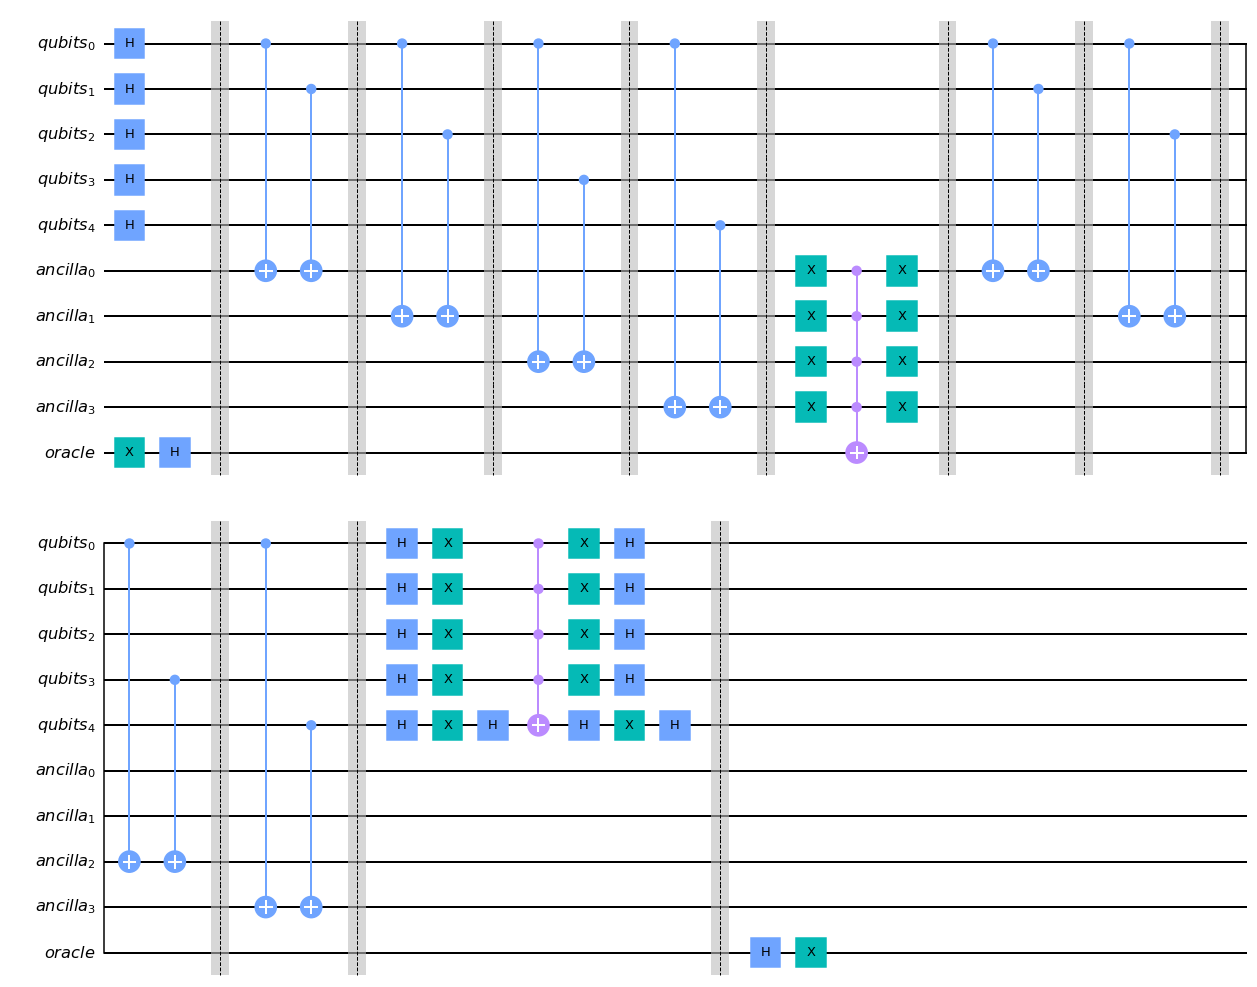

In [22]:
gpcs.quantum_circuit().draw(output = "mpl")

In [23]:
gpcs.get_classical_error_correction_code()

{'code': '[5,1,5]', 'n': 5, 'k': 1, 'd': 5, 'codewords': ['00000', '11111']}

## Example (4)

$H = \left[\begin{array}{cccccc} 0 & 1 & 1 & 1 & 0 & 0\\ 1 & 0 & 1 & 0 & 1 & 0 \\ 1 & 1 & 0 & 0 & 0 & 1 \end{array}\right]$

In [24]:
matrix_H = np.array([[0,1,1,1,0,0],[1,0,1,0,1,0],[1,1,0,0,0,1]])

$\left[\begin{array}{cccccc} 0 & 1 & 1 & 1 & 0 & 0\\ 1 & 0 & 1 & 0 & 1 & 0 \\ 1 & 1 & 0 & 0 & 0 & 1 \end{array}\right]\left[\begin{array}{c} x_1 \\ x_2 \\ x_ 3 \\ x_4 \\ x_5 \\ x_6\end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \\ 0\end{array}\right]$

(1) : $x_2 + x_3 + x_4 = 0$

(2) : $x_1 + x_3 + x_5 = 0$

(3) : $x_1 + x_2 + x_6 = 0$

In [25]:
gpcs = GroverParityCheckSolver(parity_check_matrix = matrix_H)

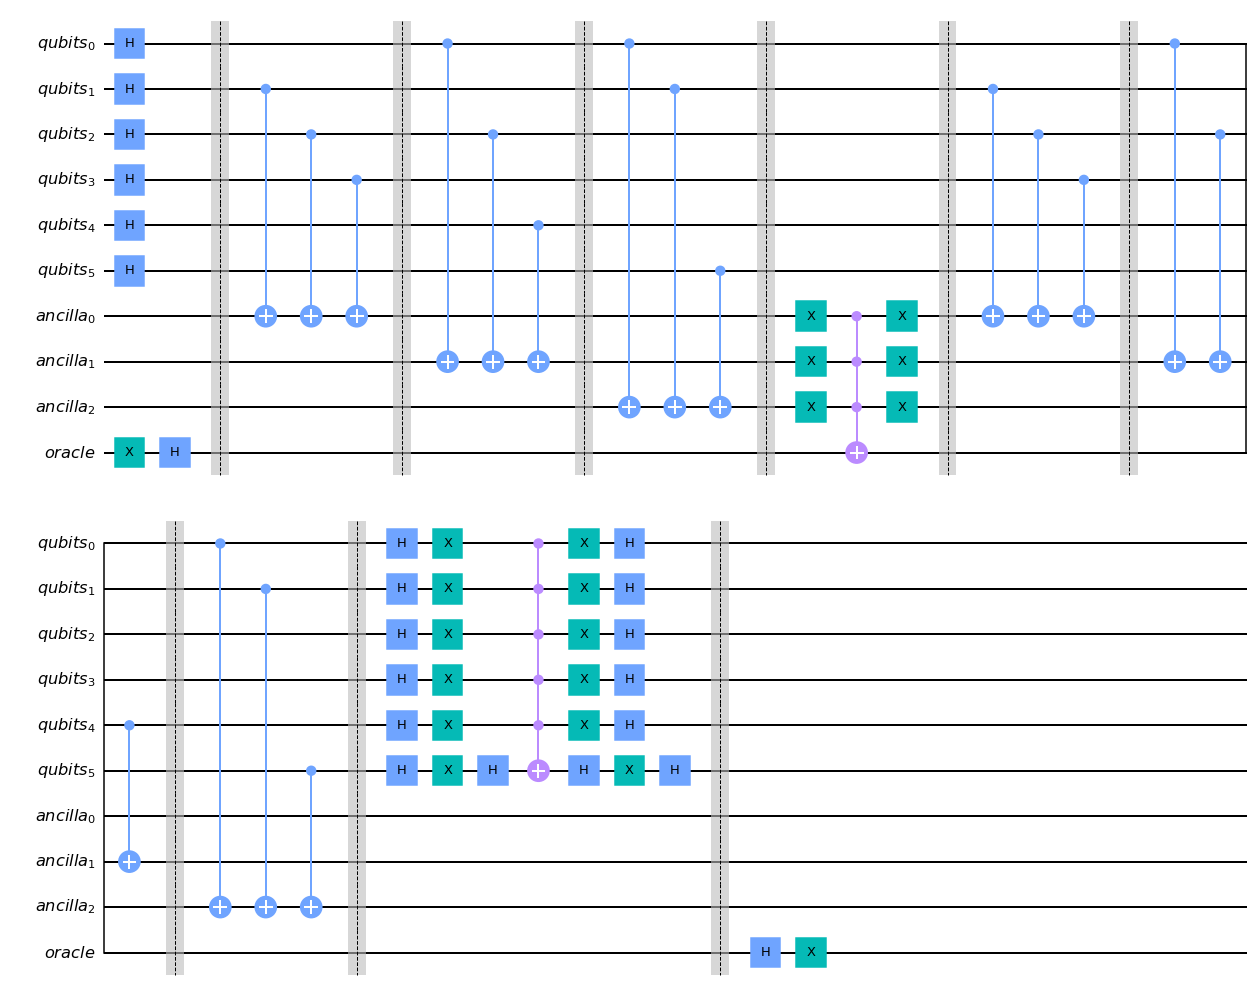

In [26]:
gpcs.quantum_circuit().draw(output = "mpl")

In [27]:
gpcs.get_classical_error_correction_code()

{'code': '[6,3,3]',
 'n': 6,
 'k': 3,
 'd': 3,
 'codewords': ['000000', '000111', '011011', '011100']}

## Example (5)

$H = \left[\begin{array}{ccccccc} 0 & 0 & 0 & 1 & 1 & 1 & 1\\ 0 & 1 & 1 & 0 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 1 & 0 & 1 \end{array}\right]$

In [28]:
matrix_H = np.array([[0,0,0,1,1,1,1],[0,1,1,0,0,1,1],[1,0,1,0,1,0,1]])

$\left[\begin{array}{ccccccc} 0 & 0 & 0 & 1 & 1 & 1 & 1\\ 0 & 1 & 1 & 0 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 1 & 0 & 1 \end{array}\right]\left[\begin{array}{c} x_1 \\ x_2 \\ x_ 3 \\ x_4 \\ x_5 \\ x_6 \\ x_7\end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \\ 0\end{array}\right]$

(1) : $x_4 + x_5 + x_6 + x_7 = 0$

(2) : $x_2 + x_3 + x_6 + x_7 = 0$

(3) : $x_1 + x_3 + x_5 + x_7 = 0$

In [29]:
gpcs = GroverParityCheckSolver(parity_check_matrix = matrix_H)

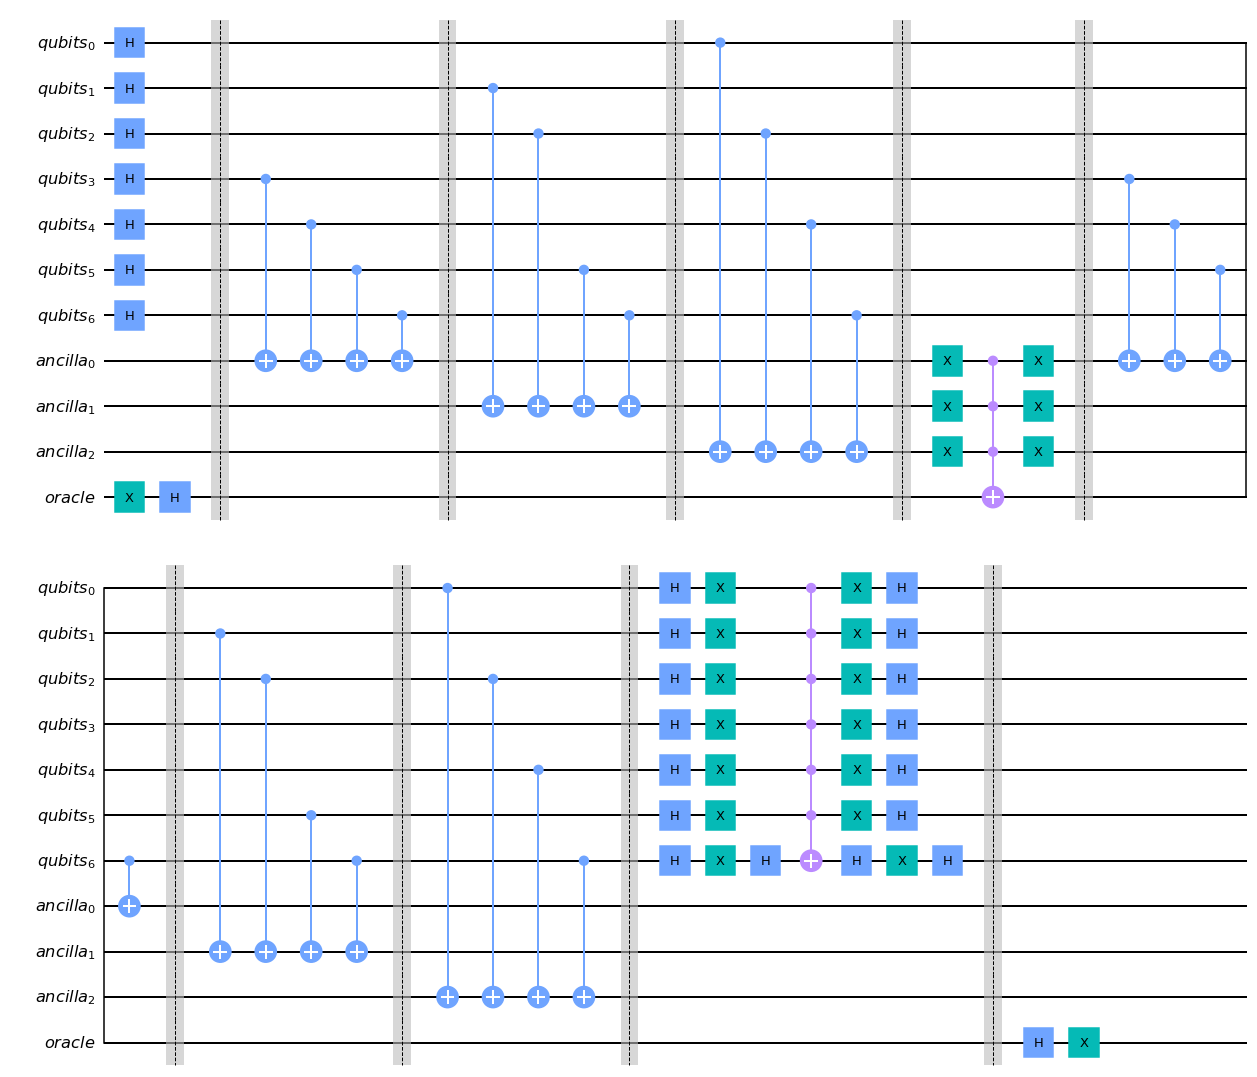

In [30]:
gpcs.quantum_circuit().draw(output = "mpl")

In [31]:
gpcs.get_classical_error_correction_code()

{'code': '[7,4,3]',
 'n': 7,
 'k': 4,
 'd': 3,
 'codewords': ['0000000',
  '0000111',
  '0011001',
  '0011110',
  '0101010',
  '0101101',
  '0110011',
  '0110100',
  '1001011',
  '1001100',
  '1010010',
  '1010101',
  '1100001',
  '1100110',
  '1111000',
  '1111111']}

# References:

[1] MacWilliams, Florence Jessie, and Neil James Alexander Sloane. The theory of error correcting codes. Vol. 16. Elsevier, 1977.

[2] [Exercise 2a of the IBM Quantum Challenge 2020](https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/exercises/week-2/ex_2a_en.ipynb)

[3] [Qiskit textbook chapter about Grover's Algorithm](https://qiskit.org/textbook/ch-algorithms/grover.html)